Step 1: Analyze & Visualize the Data
Before we jump into clustering or machine learning, it’s crucial to understand your data. Visualization and basic statistics are the foundation of data-driven intuition.
We’ll cover:
-Plot distributions of Age_Group, Income_Level, Product_Type, Shop_Frequency.
-Look at correlations between Salary, Monthly_Purchases, and Product_Type.
Once you deeply understand your data, K-Means clustering and ML simulations will make more sense.

Step 1A: Visualizing Distributions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
synthetic_population = pd.read_csv("Synthetic_customer_data.csv")
synthetic_population.head()

,Gender,Age_Group,Income_Level,Shop_Frequency,Product_Type,Salary,Monthly_Purchase
0,1,1,3,1,4,73247,0
1,2,3,3,3,6,79965,10
2,2,2,2,3,3,45093,11
3,2,3,2,2,4,40471,5
4,2,2,2,3,4,33832,12


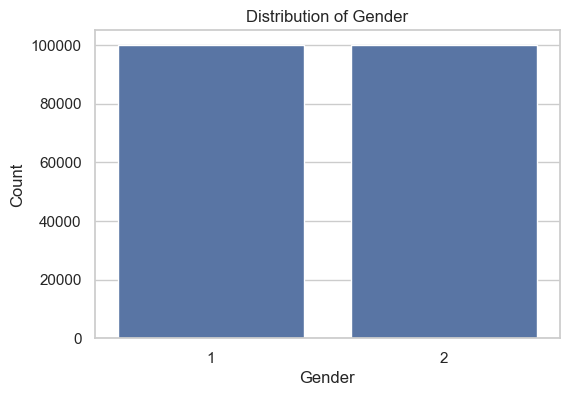

In [4]:
# Plotting the distribution of Gender
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=synthetic_population)
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

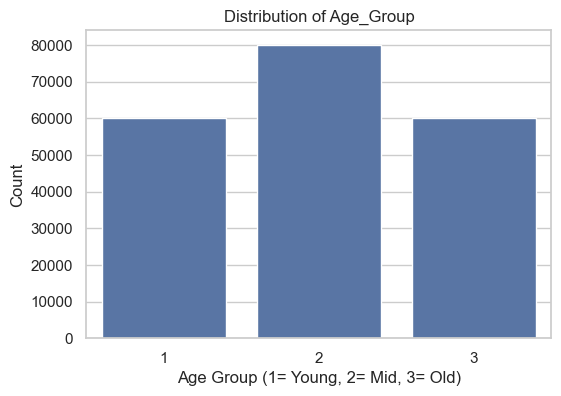

In [6]:
# Plotting the distribution of Age_Group
plt.figure(figsize=(6,4))
sns.countplot(x="Age_Group", data=synthetic_population)
plt.title("Distribution of Age_Group")
plt.xlabel("Age Group (1= Young, 2= Mid, 3= Old)")
plt.ylabel("Count")
plt.show()

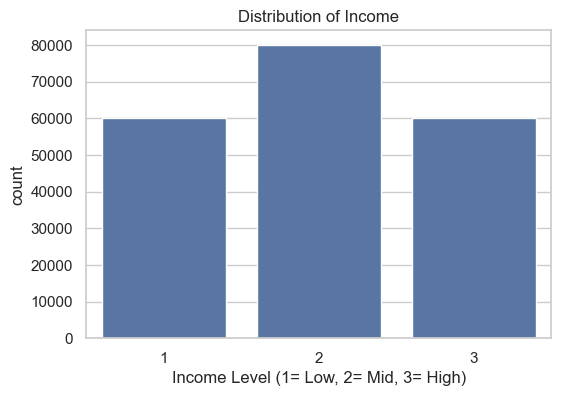

In [7]:
# Plotting the distribution of Income_Level
plt.figure(figsize=(6,4))
sns.countplot(x="Income_Level", data=synthetic_population)
plt.title("Distribution of Income")
plt.xlabel("Income Level (1= Low, 2= Mid, 3= High)")
plt.ylabel("count")
plt.show()

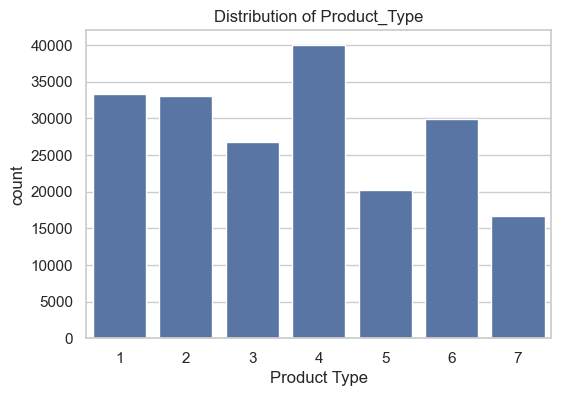

In [8]:
# Plotting the distribution of Product_Type
plt.figure(figsize=(6,4))
sns.countplot(x="Product_Type", data=synthetic_population)
plt.title("Distribution of Product_Type")
plt.xlabel("Product Type")
plt.ylabel("count")
plt.show()

Step 1B: Correlations
We’ll focus on numeric variables in your dataset:
-Salary
-Monthly_Purchase
-(Optional) Shop_Frequency — although it’s categorical, it’s numeric-coded, so we can include it.

We’re isolating the numeric columns because correlation works on numbers.

In [ ]:
numeric_cols=["Salary", "Monthly_Purchase", "Shop_Frequency"]
numeric_data = synthetic_population[numeric_cols]
numeric_data.head()

,Salary,Monthly_Purchase,Shop_Frequency
0,73247,0,1
1,79965,10,3
2,45093,11,3
3,40471,5,2
4,33832,12,3


data.corr() computes Pearson correlation between all pairs of numeric variables.
Values range from -1 to 1:
1 → perfect positive correlation
0 → no correlation
-1 → perfect negative correlation

In [10]:
corr_matrix= numeric_data.corr()
corr_matrix

,Salary,Monthly_Purchase,Shop_Frequency
Salary,1.000000,0.242034,0.257779
Monthly_Purchase,0.242034,1.000000,0.927397
Shop_Frequency,0.257779,0.927397,1.000000


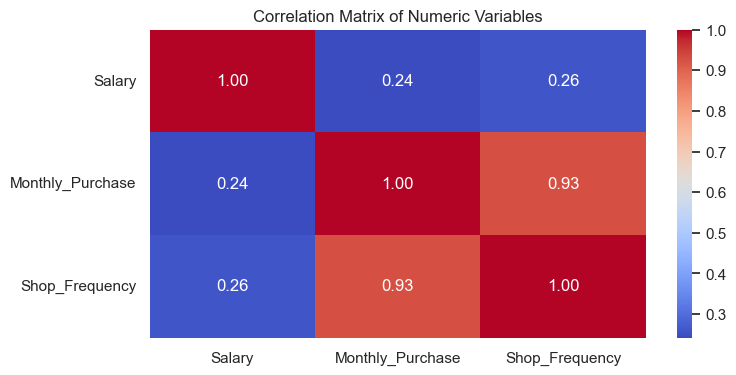

In [14]:
# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(8,4))
sns.heatmap(corr_matrix, annot= True, cmap = "coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Variables")
plt.show()

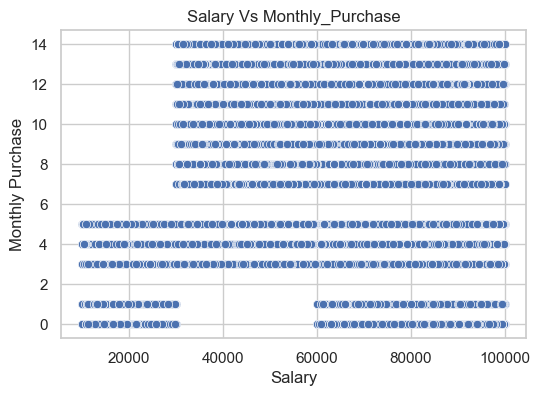

In [15]:
# Scatter Plot of Salary Vs Monthly_Purchase
plt.figure(figsize=(6,4))
sns.scatterplot(x="Salary", y="Monthly_Purchase", data=synthetic_population)
plt.title("Salary Vs Monthly_Purchase")
plt.xlabel("Salary")
plt.ylabel("Monthly Purchase")
plt.show()

-Scatter plots show the relationship between two numeric variables.
-You can visually check patterns: Do higher salaries correspond to more purchases?
-Which variables move together.
-Whether high salary customers shop more often.
-How Shop_Frequency relates to purchases.

Step 2 — K-Means Clustering, where we’ll segment customers based on numeric features.

Step 2A: Prepare Data for Clustering
K-Means works on numeric data, so we need to select the relevant columns. Usually, we pick variables like:
-Salary → continuous
-Monthly_Purchase → continuous
-Shop_Frequency → numeric-coded categorical
Optional: You can include Income_Level too if you want.

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# select features for clustering (numerical_cols and numerical_data from before)
features= ["Salary", "Monthly_Purchase", "Shop_Frequency"]
X = synthetic_population[features]
X.head()

,Salary,Monthly_Purchase,Shop_Frequency
0,73247,0,1
1,79965,10,3
2,45093,11,3
3,40471,5,2
4,33832,12,3


Step 2B: Scale Features
StandardScaler → we’ll scale features so that variables with large numbers (Salary) don’t dominate small numbers (Shop_Frequency).
Scaling ensures all variables contribute equally.

In [ ]:
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)
# Check first 5 rows after scaling
X_scaled[:5]

array([[ 1.00782522, -1.17333689, -1.29099445],
       [ 1.27617492,  1.22061748,  1.29099445],
       [-0.11678295,  1.46001292,  1.29099445],
       [-0.30140819,  0.0236403 ,  0.        ],
       [-0.56660225,  1.69940836,  1.29099445]])

Step 2C: Determine Number of Clusters (k)
A common method is the Elbow Method

In [25]:
inertia = []
# inertia measures how tight the clusters are, lower is better.
K_range=range(1,11) 
for k in K_range:
    kmeans= KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

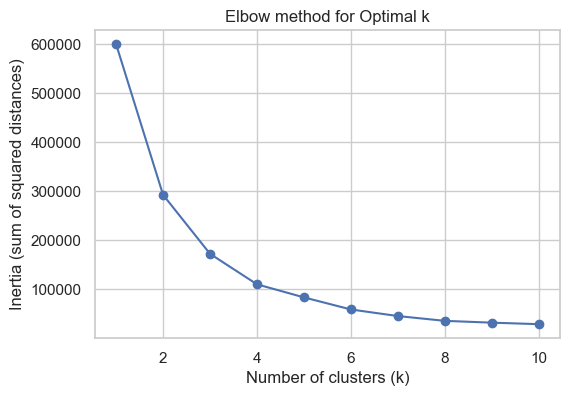

In [26]:
# plot the elbow curve
# look for the "elbow point"- inertia stops decreasing sharply. That's your k.
plt.figure(figsize=(6,4))
plt.plot(K_range,inertia, marker='o')
plt.title("Elbow method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (sum of squared distances)")
plt.show()

the elbow suggests k=4

Step 2D: Fit K-Means with Chosen k

In [28]:
kmeans=KMeans(n_clusters=4, random_state=42)
clusters= kmeans.fit_predict(X_scaled)
# fit_predict → fits the model and assigns each row to a cluster.

# Add cluster labels to the dataset
synthetic_population["Cluster"]=clusters
synthetic_population.head()

,Gender,Age_Group,Income_Level,Shop_Frequency,Product_Type,Salary,Monthly_Purchase,Cluster
0,1,1,3,1,4,73247,0,3
1,2,3,3,3,6,79965,10,0
2,2,2,2,3,3,45093,11,0
3,2,3,2,2,4,40471,5,2
4,2,2,2,3,4,33832,12,0


Step 2E: Analyze Clusters

In [29]:
cluster_summary=synthetic_population.groupby("Cluster")[features].mean()
cluster_summary

,Salary,Monthly_Purchase,Shop_Frequency
Cluster,,,
0,56686.912233,10.501517,3.000000
1,20046.176500,0.500575,1.000000
2,37471.931916,4.008018,2.000000
3,80953.059603,2.149271,1.473933


Interpreting the Clusters
1) Cluster 0 — High-spenders, frequent shoppers
-Salary ≈ 56k
-Monthly purchases ≈ 10.5
-Shop Frequency = 3 (frequent)
These are engaged, mid-to-high income customers who shop often and buy a lot. This is your best-performing segment.

2) Cluster 1 — Low-income, rare shoppers
-Salary ≈ 20k
-Monthly purchases ≈ 0.5
-Shop Frequency = 1 (rare)
These are low-income customers with very low engagement. Marketing effort here may have low ROI.

3) Cluster 2 — Middle-income, moderate shoppers
-Salary ≈ 37k
-Monthly purchases ≈ 4
-Shop Frequency = 2 (sometimes)
Classic average customers with regular shopping — a good target for loyalty programs.

4) Cluster 3 — High-income, low-purchase shoppers
-Salary ≈ 81k
-Monthly purchases ≈ 2
-Shop Frequency ≈ 1.5
This group is fascinating: They are rich, BUT They don't shop much.
These could be: Customers who buy expensive items occasionally. Customers who like premium but rarely return
Potential segment to target with: “VIP premium offers,” “exclusive drops,” etc.

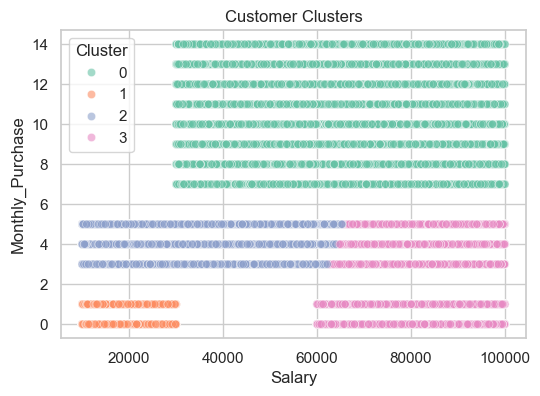

In [30]:
# Visualize the clusters (Salary Vs Monthly Purchase)
plt.figure(figsize= (6,4))
plt.title("Customer Clusters")
sns.scatterplot(x="Salary", y="Monthly_Purchase", hue="Cluster", palette="Set2", data=synthetic_population, alpha=0.6)
plt.show()

Step 3: Machine Learning Simulation

We have two paths:
1) Option 1 — Regression: predict Monthly_Purchase
This teaches:
-train/test split
-linear regression
-evaluating predictions
-plotting residuals

2) Option 2 — Classification: classify Product_Type
This teaches:
-preprocessing categorical data
-logistic regression / random forest
-model accuracy
-confusion matrix

Regression Task: Predict Monthly_Purchase
GOAL:
Use data like:
-Salary
-Shop_Frequency
-Income_Level
-Age_Group
-Gender
to predict how many purchases a customer makes per month.
his is a classic supervised regression problem.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# target: Monthly_Purchase
# X = features to use for prediction
y=synthetic_population["Monthly_Purchase"]
X =synthetic_population[["Salary", "Shop_Frequency", "Income_Level",  "Age_Group", "Gender"]]

Why these features?
-Salary → higher earners might buy more
-Shop_Frequency → directly linked to purchases
-Income_Level → low/medium/high affects buying power
-Age_Group → young/middle/old shopping behavior
-Gender → might have patterns in synthetic data

In [39]:
X_train, X_test, y_train, y_test =train_test_split( X, y, test_size=0.2, random_state=42)
# 80% data → training, 20% data → testing, random_state=42 ensures reproducibility

In [40]:
# train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

.fit() teaches the model the relationship between X → y
The model learns coefficients for each feature

In [41]:
# make predictions
y_pred = model.predict(X_test)

In [42]:
# evaluate model
mse = mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print("Mean Squared Error = ", mse)
print("R2 Score = ", r2)

Mean Squared Error =  2.144256074500411
R2 Score =  0.8769818008044041


MSE → lower is better
R² → ranges from 0 to 1
|-> 1 = perfect
|-> 0 = predicts nothing
|-> negative → model is worse than guessing

Mean Squared Error (MSE): 2.14
On average, predictions are off by about √2.14 ≈ 1.46 purchases.
That’s very good because your range is 0–15 purchases.

R² Score: 0.877
Your model explains 87.7% of the variance in Monthly_Purchase.
That's extremely strong for behavioral prediction.

In [44]:
# check coefficients
coef_df=pd.DataFrame(
    {
        "Feature": X.columns,
        "Coefficient": model.coef_
    }
)
coef_df

,Feature,Coefficient
0,Salary,-0.000002
1,Shop_Frequency,5.536129
2,Income_Level,0.237531
3,Age_Group,-0.962519
4,Gender,0.244261


1. Salary → -0.000002 (basically zero)
-This coefficient is extremely small, basically 0.
-Although high salary is associated with some types of shoppers (like cluster 3),
salary by itself doesn’t strongly predict monthly purchase count.
-A high salary doesn’t guarantee frequent shopping.
-Some high earners (Cluster 3) actually shop less.


2. Shop_Frequency → +5.54 (very strong positive effect)
-This is HUGE — and it makes sense.
-If Shop_Frequency increases by 1 level (1→2 or 2→3), Monthly_Purchases increases by 5.5 purchases per month. This is the main predictor.
It's exactly how the synthetic data was designed:
-Rare shoppers (1) → 0–2 purchases
-Sometimes shoppers (2) → 3–6
-Frequent shoppers (3) → 7–15


3. Income_Level → +0.24
-Small but positive effect.
-Higher income → slightly more purchases.
This makes sense, because your synthetic rules made high-income customers:
-more likely to have higher salaries
-sometimes assigned to categories that shop slightly more
But it is not nearly as strong as Shop_Frequency.

4. Age_Group → -0.96
This is interesting (and realistic):
Older age groups buy about 1 fewer item per month per age level.
-Age 1 (Young) → buy more
-Age 2 (Middle) → buy less
-Age 3 (Older) → buy even less
-This matches many real-world retail trends: Young customers tend to shop more frequently (especially categories like fashion, electronics, trends).

5. Gender → +0.24
A very small effect.
Gender has only a tiny impact on purchases. (Which is good — realistic and fair.)
This means your synthetic data design wasn’t biased toward one gender shopping more, and the model learned that.

The most important predictors:
-Shop_Frequency → by far the strongest
-Age_Group → older customers shop less
-Income_Level → slight boost
-Gender → almost no effect
-Salary → no meaningful linear relationship

Classification Task: Predict Product_Type
We want the model to learn patterns like:
-“Older, high-income customers tend to prefer Product Type 3”
-“Young low-income customers prefer Product Type 1”
This is multiclass classification because Product_Type has more than 2 categories.

We’ll use a Random Forest Classifier because:
-it works well with mixed numeric data
-it captures non-linear relationships
-it gives feature importances

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [50]:
# target: Product_Type
# X= features to use for prediction
y=synthetic_population["Product_Type"]
X =synthetic_population[["Gender", "Age_Group", "Income_Level", "Salary", "Shop_Frequency", "Monthly_Purchase"]]
# They are characteristics that influence what product category people buy.

In [51]:
X_train, X_test, y_train, y_pred= train_test_split(X, y, test_size=0.2, random_state=42)
# 80% → training, 20% → testing, random_state=42 ensures you get the same split every time

In [52]:
# train random forest model
model=RandomForestClassifier(
    n_estimators=200, # number of trees
    max_depth=None, # tree grows fully
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [53]:
# Predict Product_Type on test data
y_pred=model.predict(X_test)

Evaluate the classifier

In [61]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.11015


In [62]:
print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))

confusion_matrix:
 [[   0 2007 2016  683  665  658    0    0    0    0    0    0    0    0
     0]
 [   0 1986 1894  643  651  683    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0  846  459 1371  413 1652  669    0    0    0    0    0    0
     0]
 [   0    0  890  430 1321  481 1488  712    0    0    0    0    0    0
     0]
 [   0    0  881  432 1337  484 1557  666    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0  310    0  339  318  159  166  156    0    0    0    0    0    0
     0]
 [   0  330    0  329  331  153  161  193    0    0    0    0    0    0
     0]
 [   0  336    0  340  329  158  152  175    0    0    0    0    0    0
     0]
 [   0  325    0  389  340  176  171  181    0    0    0    0    0    0
     0]
 [   0  378    0  309  345  147  169  175    0    0    0    0    0    0
     0]
 [   0  346    0  324

In [65]:
print("classification_report:\n",classification_report(y_test, y_pred))

classification_report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      6029
           1       0.30      0.34      0.32      5857
           2       0.00      0.00      0.00         0
           3       0.09      0.08      0.09      5410
           4       0.17      0.25      0.20      5322
           5       0.12      0.09      0.10      5357
           6       0.00      0.00      0.00         0
           7       0.04      0.11      0.06      1448
           8       0.00      0.00      0.00      1497
           9       0.00      0.00      0.00      1490
          10       0.00      0.00      0.00      1582
          11       0.00      0.00      0.00      1523
          12       0.00      0.00      0.00      1499
          13       0.00      0.00      0.00      1569
          14       0.00      0.00      0.00      1417

    accuracy                           0.11     40000
   macro avg       0.05      0.06      0.05     40000
we

c:\Users\Admin\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\venv\Lib\site-packages\sklearn\metrics\_classifi

The model is performing poorly due to issues with how the Product_Type column was generated. 
-The accuracy is extremely low (0.11) because many classes in Product_Type never appeared in the training data.
=The confusion matrix shows rows of all zeros, indicating the model never encountered certain product types.

Product_Type was generated using random patterns, leading to:
-Some classes appearing very often (dominant classes).
-Some classes never appearing in the dataset.
-No consistent or meaningful pattern for the model to learn.
-Product_Type is Mostly Random Noise. High randomness destroys any signal that the model can use.
The result: No predictable patterns in the data, making classification learning nearly impossible.

Feature Importance
This shows which features contributed most to predicting product categories.

In [64]:
importances=model.feature_importances_
feature_importance_df= pd.DataFrame({
    "Features": X.columns,
    "Importances":importances
}).sort_values(by = "Importances", ascending=False)
feature_importance_df

,Features,Importances
3,Salary,0.781975
1,Age_Group,0.056427
4,Shop_Frequency,0.052199
2,Income_Level,0.051088
5,Monthly_Purchase,0.050598
0,Gender,0.007713


Salary dominates, but wasn’t used to generate Product_Type, which shows the model is struggling to find meaningful patterns.

-Data doesn’t support classification well
The way Product_Type was generated in your dataset — with too much randomness — makes it difficult for a model to learn clean patterns. There just isn’t enough structure for a meaningful classification.

-No clear relationship between features and target
A good classification task requires some level of predictable relationship between the features and the target variable. Here, the random noise introduced in Product_Type might make classification unreliable or overly complex.